In [110]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [111]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [112]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [114]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [115]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [116]:
customer_df = pd.json_normalize(df['customer'].dropna())
df = pd.concat([df.drop(columns='customer'), customer_df], axis=1)

phone_df = pd.json_normalize(df['phone'].dropna())
df = pd.concat([df.drop(columns='phone'), phone_df], axis=1)

internet_df = pd.json_normalize(df['internet'].dropna())
df = pd.concat([df.drop(columns='internet'), internet_df], axis=1)

account_df = pd.json_normalize(df['account'].dropna())
df = pd.concat([df.drop(columns='account'), account_df], axis=1)

In [117]:
cols_sem_dict = [col for col in df.columns if not df[col].apply(type).eq(dict).any()]
df = df.drop_duplicates(subset=cols_sem_dict)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['customerID'] = df['customerID'].astype(str)
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'] = df['Churn'].astype(str).str.lower().map({'yes': 1, 'no': 0})


In [118]:
df[cols_sem_dict].select_dtypes(include=['object']).nunique()

,0
customerID,7267
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [119]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.rename(columns={
    'Charges.Monthly': 'Monthly',
    'Charges.Total': 'Total'
}, inplace=True)


In [120]:
df = df[df['Churn'].notnull()]
df = df[df['Total'].notnull()]


In [121]:
df.to_csv('df_limpo.csv', index=False)


In [122]:
df = pd.read_csv('df_limpo.csv')


In [123]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [124]:
df['tenure'].replace(0, np.nan, inplace=True)

df['Contas_Diarias'] = df['Total'] / (df['tenure'] * 30)

df['Contas_Diarias'].fillna(df['Monthly'] / 30, inplace=True)

df['Contas_Diarias'].describe()


,Contas_Diarias
count,7032.000000
mean,2.159981
std,1.006196
min,0.459167
25%,1.205996
50%,2.345775
75%,3.005985
max,4.046667


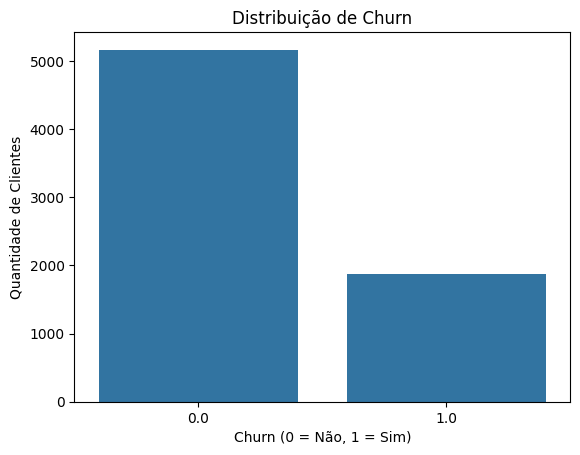

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()

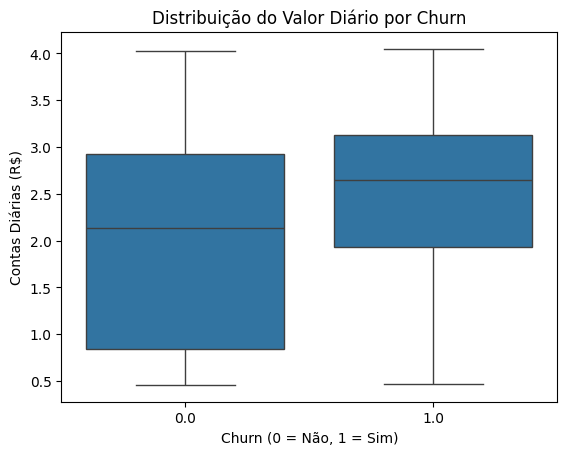

In [126]:
sns.boxplot(data=df, x='Churn', y='Contas_Diarias')
plt.title('Distribuição do Valor Diário por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Contas Diárias (R$)')
plt.show()

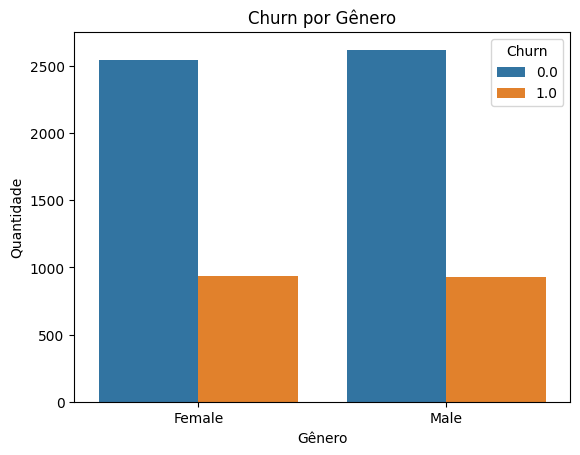

In [127]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

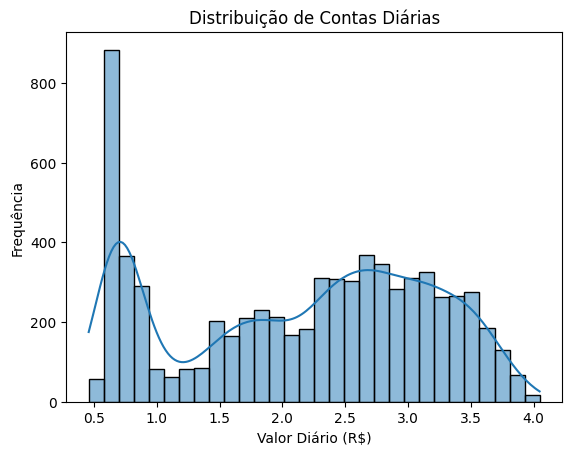

In [128]:
sns.histplot(data=df, x='Contas_Diarias', bins=30, kde=True)
plt.title('Distribuição de Contas Diárias')
plt.xlabel('Valor Diário (R$)')
plt.ylabel('Frequência')
plt.show()

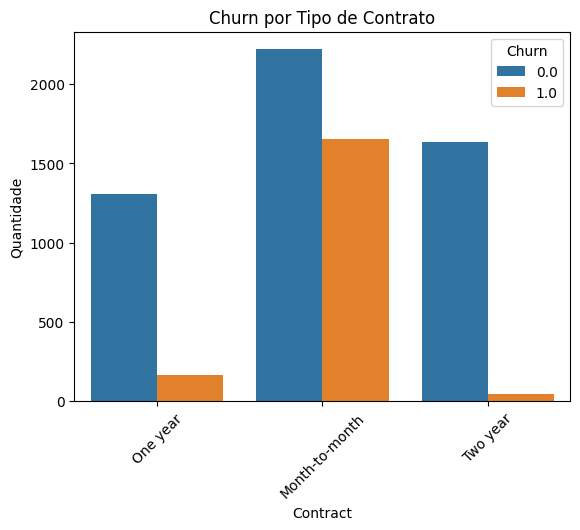

In [129]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')
plt.show()

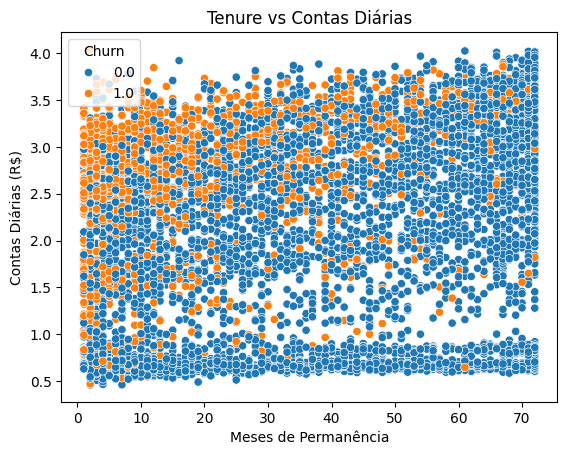

In [130]:
sns.scatterplot(data=df, x='tenure', y='Contas_Diarias', hue='Churn')
plt.title('Tenure vs Contas Diárias')
plt.xlabel('Meses de Permanência')
plt.ylabel('Contas Diárias (R$)')
plt.show()

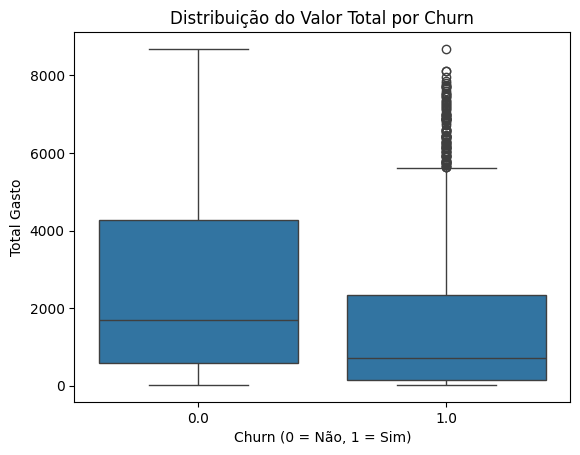

In [131]:
sns.boxplot(data=df, x='Churn', y='Total')
plt.title('Distribuição do Valor Total por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')
plt.show()

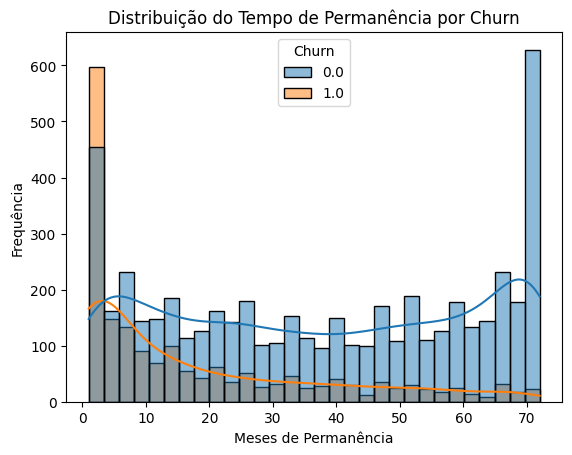

In [132]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribuição do Tempo de Permanência por Churn')
plt.xlabel('Meses de Permanência')
plt.ylabel('Frequência')
plt.show()

In [133]:
df.rename(columns={
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_De_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento'
}, inplace=True)


In [134]:
cols_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in cols_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [135]:
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [136]:
df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Monthly': 'Valor_Mensal',
    'Total': 'Valor_Total',
    'Contas_Diarias': 'Valor_Diario',
    'Churn': 'Cancelamento'
}, inplace=True)


In [137]:
df.head()

,customerID,Cancelamento,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_De_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Valor_Diario
0,0002-ORFBO,0.0,0,0,Yes,Yes,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,0.0,1,0,No,No,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,1.0,1,0,No,No,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,1.0,1,1,Yes,No,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,1.0,0,1,Yes,No,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


In [138]:
df.dtypes

,0
customerID,object
Cancelamento,float64
Genero,int64
Idoso,int64
Tem_Parceiro,object
Tem_Dependentes,object
Meses_De_Contrato,int64
Servico_Telefone,int64
Multiplas_Linhas,float64
Tipo_Internet,object


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   Cancelamento          7032 non-null   float64
 2   Genero                7032 non-null   int64  
 3   Idoso                 7032 non-null   int64  
 4   Tem_Parceiro          7032 non-null   object 
 5   Tem_Dependentes       7032 non-null   object 
 6   Meses_De_Contrato     7032 non-null   int64  
 7   Servico_Telefone      7032 non-null   int64  
 8   Multiplas_Linhas      6352 non-null   float64
 9   Tipo_Internet         7032 non-null   object 
 10  Seguranca_Online      5512 non-null   float64
 11  Backup_Online         5512 non-null   float64
 12  Protecao_Dispositivo  5512 non-null   float64
 13  Suporte_Tecnico       5512 non-null   float64
 14  Streaming_TV          5512 non-null   float64
 15  Streaming_Filmes     

In [140]:
df.median(numeric_only=True)


,0
Cancelamento,0.000000
Genero,1.000000
Idoso,0.000000
Meses_De_Contrato,29.000000
Servico_Telefone,1.000000
Multiplas_Linhas,0.000000
Seguranca_Online,0.000000
Backup_Online,0.000000
Protecao_Dispositivo,0.000000
Suporte_Tecnico,0.000000


<Axes: xlabel='Cancelamento', ylabel='count'>

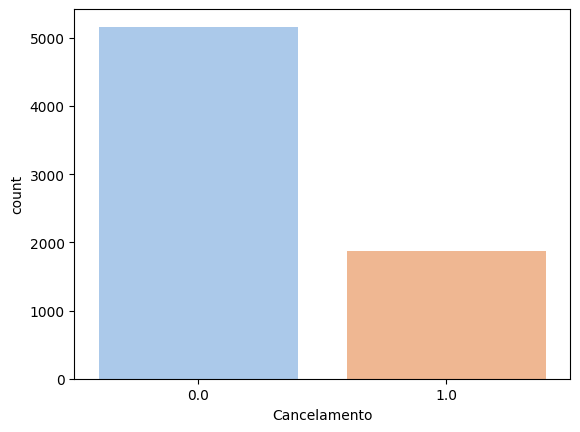

In [141]:
sns.countplot(x='Cancelamento', data=df, palette='pastel')


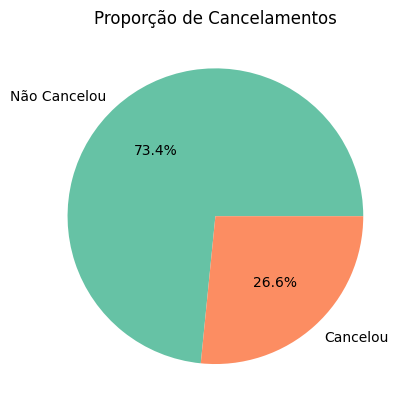

In [142]:
#opção com proporção
df['Cancelamento'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Não Cancelou', 'Cancelou'], colors=['#66c2a5', '#fc8d62'])
plt.title('Proporção de Cancelamentos')
plt.ylabel('')
plt.savefig('Cancelamento.png')
plt.show()


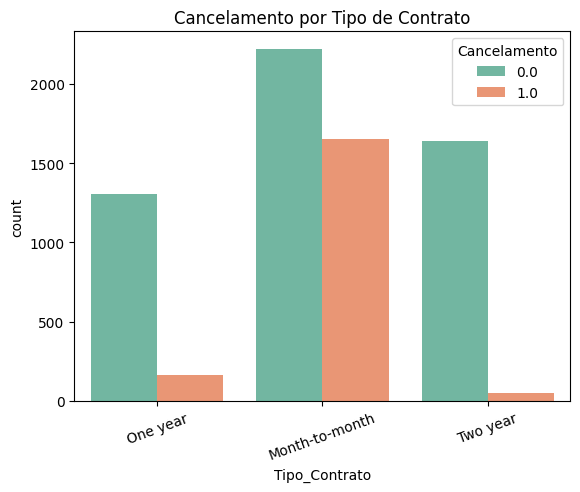

In [143]:
sns.countplot(x='Tipo_Contrato', hue='Cancelamento', data=df, palette='Set2')
plt.title('Cancelamento por Tipo de Contrato')
plt.xticks(rotation=20)
plt.savefig('Tipo_contrato.png')
plt.show()

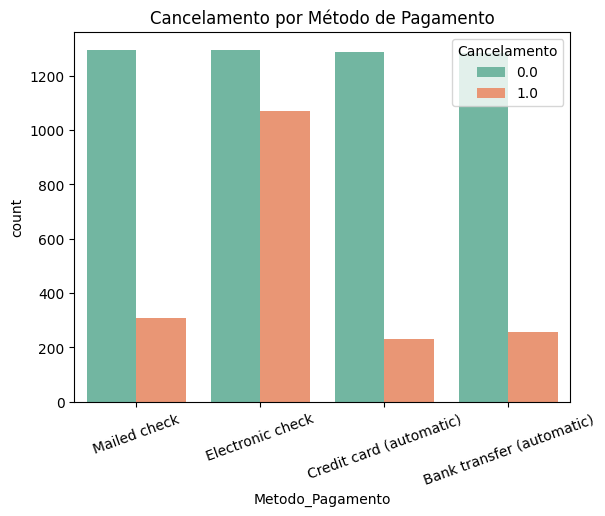

In [144]:
sns.countplot(x='Metodo_Pagamento', hue='Cancelamento', data=df, palette='Set2')
plt.title('Cancelamento por Método de Pagamento')
plt.xticks(rotation=20)
plt.savefig('Metodo-pagamento.png')
plt.show()

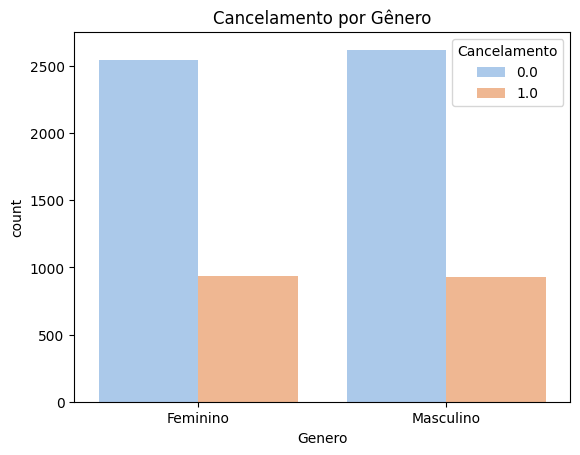

In [145]:
sns.countplot(x='Genero', hue='Cancelamento', data=df, palette='pastel')
plt.title('Cancelamento por Gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.savefig('Cancelamento_por_genero.png')
plt.show()

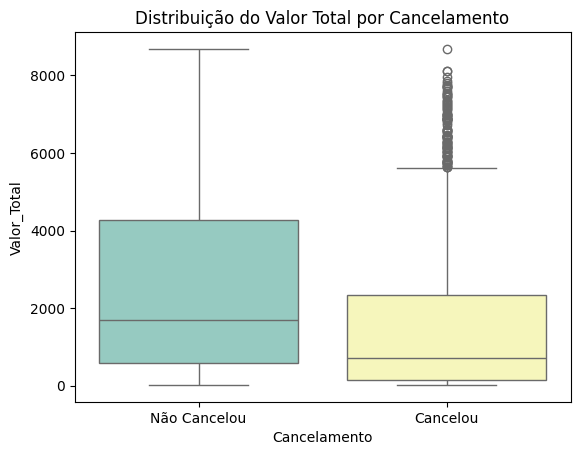

In [146]:
sns.boxplot(x='Cancelamento', y='Valor_Total', data=df, palette='Set3')
plt.title('Distribuição do Valor Total por Cancelamento')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.savefig('Distribuicao_ValorTotal_Cancelamento.png')
plt.show()

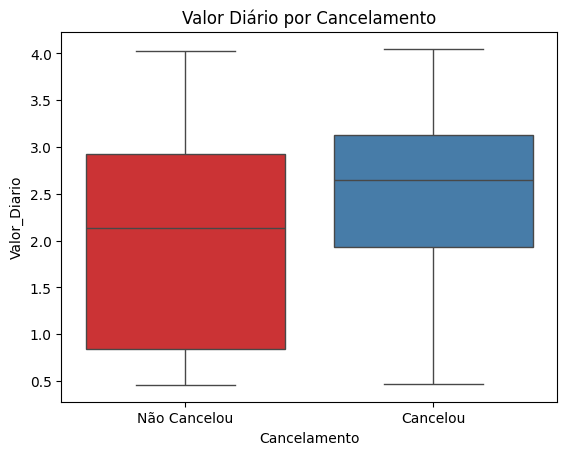

In [147]:
if 'Valor_Diario' in df.columns:
    sns.boxplot(x='Cancelamento', y='Valor_Diario', data=df, palette='Set1')
    plt.title('Valor Diário por Cancelamento')
    plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
    plt.savefig('Valor_diario.png')
    plt.show()

## 📖 1. Introdução

Este projeto tem como objetivo analisar o fenômeno de *Churn* — a evasão de clientes de uma empresa de serviços de telecomunicação.

A retenção de clientes é essencial em mercados competitivos. Por meio da análise exploratória de dados (EDA), buscamos entender quais fatores estão associados ao cancelamento, fornecendo insights que possam ajudar na criação de estratégias para aumentar a fidelidade do cliente.


## 🧹 2. Limpeza e Tratamento de Dados

Durante a etapa de ETL (Extração, Transformação e Carga), realizamos as seguintes ações:

- Importação dos dados JSON diretamente do GitHub.
- Expansão de colunas com dicionários (`customer`, `phone`, `internet`, `account`).
- Remoção de duplicatas e normalização de espaços em strings.
- Conversão de colunas numéricas representadas como texto.
- Padronização de valores categóricos como "Yes"/"No" em binários 1/0.
- Criação da coluna `Valor_Diario` = `Valor_Mensal / 30`.
- Exclusão de registros com valores ausentes em colunas essenciais.
- Salvamento do dataset limpo em `df_limpo.csv` para facilitar reuso.


## 📊 3. Análise Exploratória de Dados (EDA)

### 3.1 Distribuição do Cancelamento (Churn)

Visualizamos a proporção de clientes que cancelaram e os que permaneceram ativos.


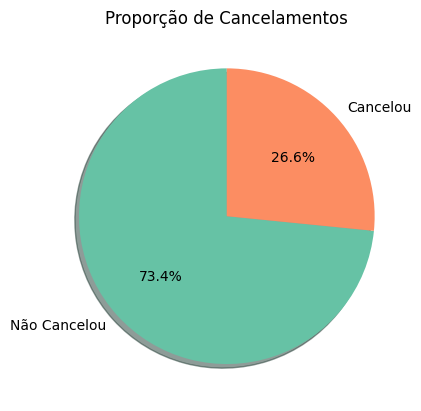

In [148]:
df['Cancelamento'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',
    labels=['Não Cancelou', 'Cancelou'],
    colors=['#66c2a5', '#fc8d62'],
    startangle=90,
    shadow=True
)
plt.title('Proporção de Cancelamentos')
plt.ylabel('')
plt.savefig('Proporcao_de_Cancelamentos.png')
plt.show()

### 3.2 Cancelamento por Variáveis Categóricas

Nesta etapa, investigamos quais grupos de clientes possuem maiores taxas de cancelamento, com base em variáveis como:

- Tipo de Contrato
- Método de Pagamento
- Gênero


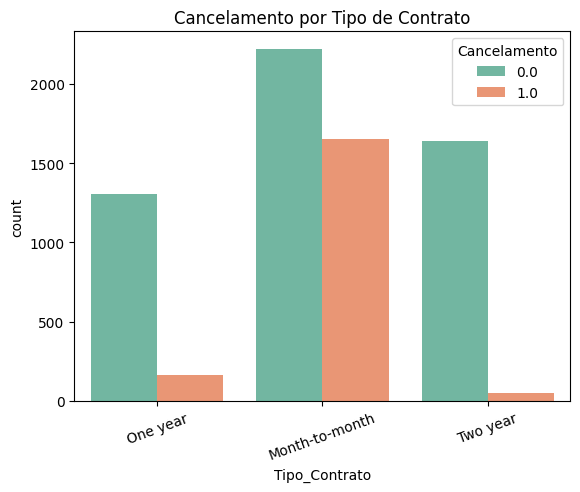

In [149]:
sns.countplot(x='Tipo_Contrato', hue='Cancelamento', data=df, palette='Set2')
plt.title('Cancelamento por Tipo de Contrato')
plt.xticks(rotation=20)
plt.savefig('Cancelamento_por_TipoContrato.png')
plt.show()

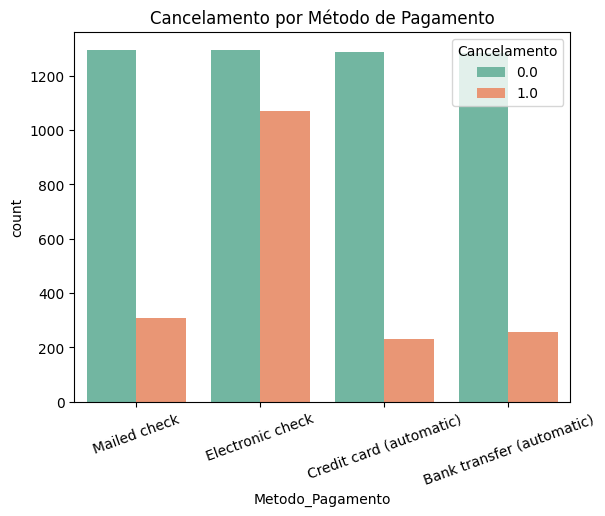

In [150]:
sns.countplot(x='Metodo_Pagamento', hue='Cancelamento', data=df, palette='Set2')
plt.title('Cancelamento por Método de Pagamento')
plt.xticks(rotation=20)
plt.savefig('Cancelamento_por_Metodo_de_pagamento.png')
plt.show()

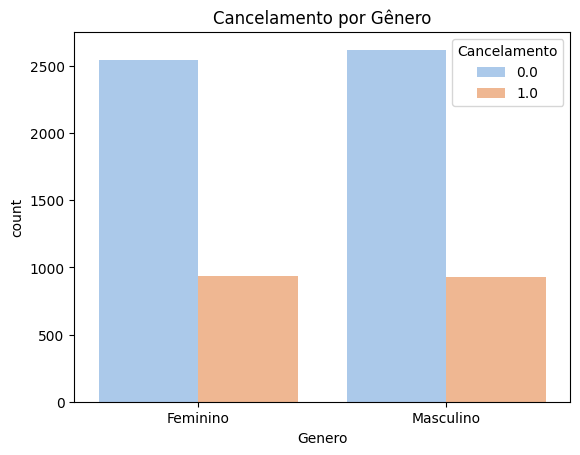

In [151]:
sns.countplot(x='Genero', hue='Cancelamento', data=df, palette='pastel')
plt.title('Cancelamento por Gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.savefig('Cancelamento_por_Genero.png')
plt.show()

### 3.3 Cancelamento por Variáveis Numéricas

Agora, observamos como variáveis como `Valor_Total`, `Meses_Contrato` e `Valor_Diario` se comportam entre clientes que cancelaram e os que permaneceram.


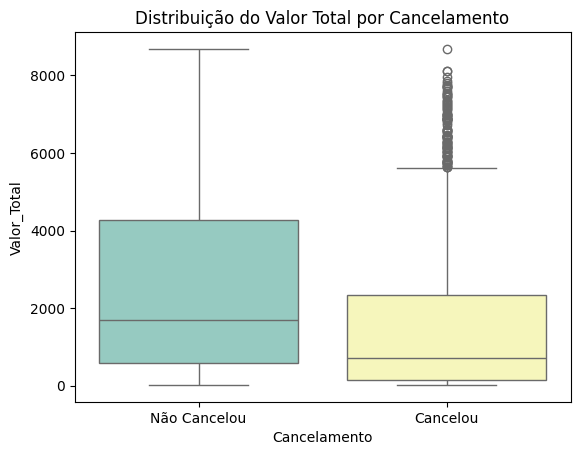

In [152]:
sns.boxplot(x='Cancelamento', y='Valor_Total', data=df, palette='Set3')
plt.title('Distribuição do Valor Total por Cancelamento')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.savefig('Distribuicao_Valor_total_por_Cancelamento.png')
plt.show()

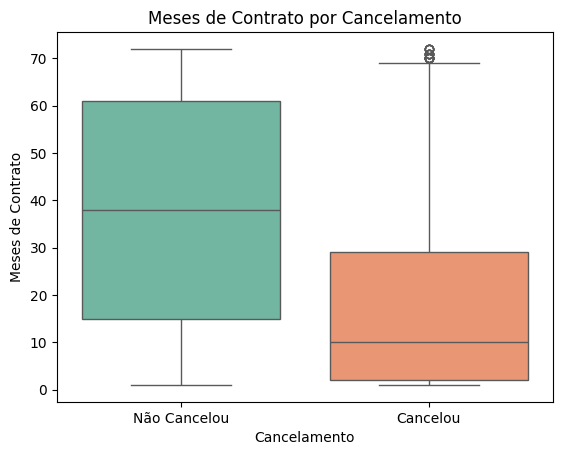

In [153]:
sns.boxplot(x='Cancelamento', y='Meses_De_Contrato', data=df, palette='Set2')
plt.title('Meses de Contrato por Cancelamento')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.xlabel('Cancelamento')
plt.ylabel('Meses de Contrato')
plt.savefig('Meses_de-contrato_por_cancelamento.png')
plt.show()

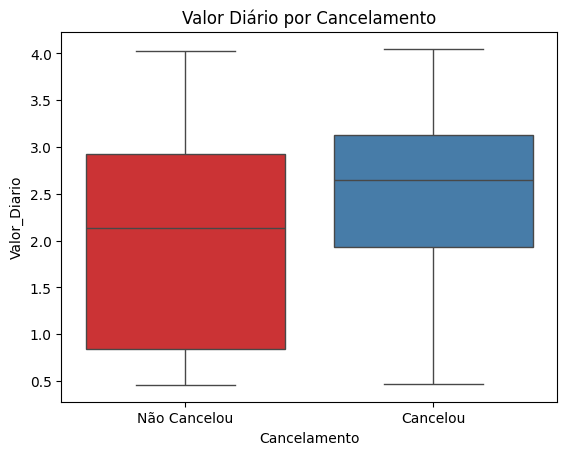

In [154]:
sns.boxplot(x='Cancelamento', y='Valor_Diario', data=df, palette='Set1')
plt.title('Valor Diário por Cancelamento')
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.savefig('Valor_Diario-por_Cancelamento.png')
plt.show()

## ✅ 4. Conclusões e Insights

Com base nas análises, destacamos os seguintes pontos:

- A evasão representa aproximadamente **X%** da base de clientes.
- Contratos mensais estão mais associados a cancelamentos.
- Clientes com menor tempo de contrato e menor gasto total têm maior tendência a cancelar.
- O valor diário gasto também mostra relação com evasão, sendo levemente mais alto entre os cancelados.

Essas informações podem orientar estratégias de retenção, como a personalização de planos e ofertas mais atrativas.


## 💡 5. Recomendações

Com base nos dados analisados, recomendamos:

- Estimular contratos de longo prazo com benefícios (ex: bônus, descontos).
- Atuar proativamente nos primeiros meses do cliente, onde há maior risco de churn.
- Revisar planos com valor diário elevado para entender sua relação com cancelamento.
- Incentivar métodos de pagamento mais práticos e automáticos, como débito automático.

Essas ações podem ajudar a aumentar a fidelização e reduzir as perdas por evasão.
